In [1]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Resizing, Rescaling
import seaborn as sns
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tqdm import tqdm  # Perform iterature with progress bar
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [2]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (32, 32)

In [3]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [4]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        #Empty Image and Labels list
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:01<00:00, 200.37it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 178.96it/s]


In [6]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((1080, 32, 32, 3), (200, 32, 32, 3))

In [7]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [8]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 1080


In [9]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

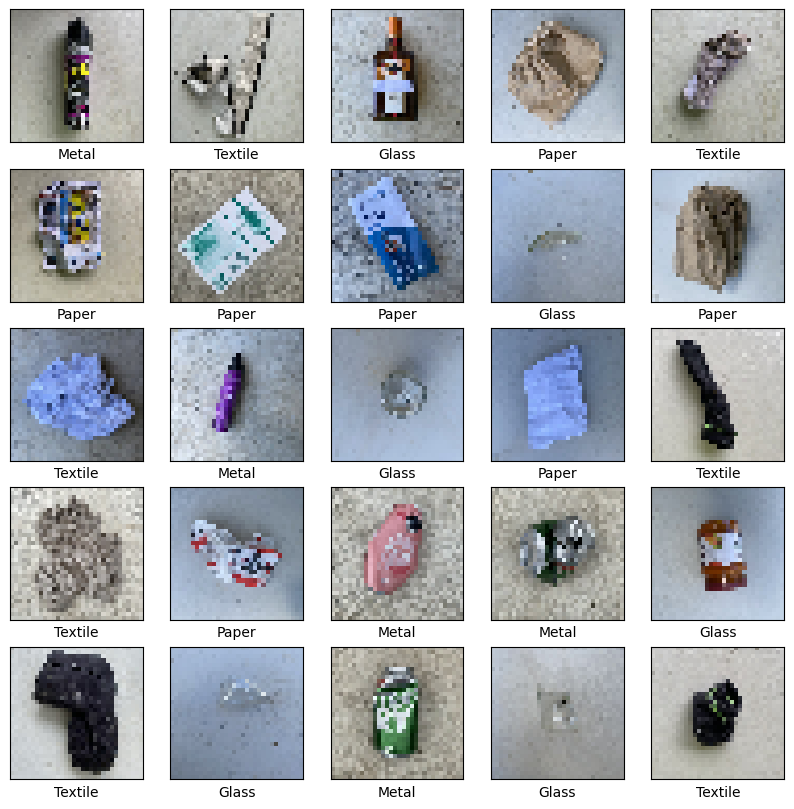

In [10]:
#Display 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
def model_1():
    inputs = tf.keras.Input(shape = (32,32,3))
    X = tf.keras.layers.Conv2D(32, 3) (inputs)
    X = tf.keras.layers.BatchNormalization()(X)                          
    X = tf.keras.activations.relu(X)                       
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    
    # Block 2
    X = tf.keras.layers.Conv2D(64, (3,3))(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(128, activation='relu')(X)
    
    X = tf.keras.layers.Dropout(0.2)(X)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(X)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model
    
model_1 = model_1()   
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,332 (1.20 MB)

 Trainable params: 315,140 (1.20 MB)

 Non-trainable params: 192 (768.00 B)

In [12]:
# Add callbacks to save the model weight with best accuracy during training

#import ModelCheckpoint package
#from tensorflow.keras.callbacks import ModelCheckpoint
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_filepath1 = 'C:/Mani/ModelCheckpoint/model1.keras'
model_checkpoint_callback1 = ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [13]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(0.0015),
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])


In [14]:
#Learning rate scheduler for Model 1 and 2

def scheduler1(epoch, lr):
    if epoch <= 30:
        return lr
    else:
        return lr * 0.95
        
    
lr_callback1 = LearningRateScheduler(scheduler1, verbose=1)

In [15]:
# Set number of epochs
epochs = 100
batch_size = 64


In [16]:
# Register the model training start time.
start_time = datetime.now()
print('Time model start:', start_time)

history1 = model_1.fit(train_images, train_labels,
                      batch_size=batch_size, epochs=epochs,
                      validation_split = 0.2, verbose=1,
                      callbacks=[lr_callback1, model_checkpoint_callback1])

# Register the model training end time.
end_time = datetime.now()
print('Time model end:', end_time)
print('Model_1_training_time', end_time - start_time)


Time model start: 2024-11-08 19:04:28.175007

Epoch 1: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 1/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3070 - loss: 3.3111
Epoch 1: val_accuracy improved from -inf to 0.29630, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3193 - loss: 3.1709 - val_accuracy: 0.2963 - val_loss: 1.3763 - learning_rate: 0.0015

Epoch 2: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 2/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5448 - loss: 1.0788
Epoch 2: val_accuracy did not improve from 0.29630
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5501 - loss: 1.0658 - val_accuracy: 0.2917 - val_loss: 1.3671 - learning_rate: 0.0015

Epoch 3: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 3/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6488 - loss: 0.8126
Epoch 3: val_accuracy d


Epoch 20: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 20/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8874 - loss: 0.2636
Epoch 20: val_accuracy did not improve from 0.31944
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8906 - loss: 0.2598 - val_accuracy: 0.2639 - val_loss: 9.2311 - learning_rate: 0.0015

Epoch 21: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 21/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9206 - loss: 0.2054
Epoch 21: val_accuracy did not improve from 0.31944
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9213 - loss: 0.2054 - val_accuracy: 0.2685 - val_loss: 8.6827 - learning_rate: 0.0015

Epoch 22: LearningRateScheduler setting learning rate to 0.001500000013038516.
Epoch 22/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9099 - loss: 0.2422
Epoch 22: val_accuracy did not improve from 0.31944
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9104 - lo

13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9826 - loss: 0.0624
Epoch 38: val_accuracy did not improve from 0.74537
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9822 - loss: 0.0637 - val_accuracy: 0.6435 - val_loss: 1.4898 - learning_rate: 0.0010

Epoch 39: LearningRateScheduler setting learning rate to 0.0009951305866707117.
Epoch 39/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9861 - loss: 0.0560
Epoch 39: val_accuracy did not improve from 0.74537
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9856 - loss: 0.0560 - val_accuracy: 0.6296 - val_loss: 1.2944 - learning_rate: 9.9513e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.0009453740960452705.
Epoch 40/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9770 - loss: 0.0636
Epoch 40: val_accuracy did not improve from 0.74537
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9772 - loss: 0.0632 - val_accuracy: 0.6667 - val_loss: 1.2357 - learning_rate: 9.4537e-04

Epoch


Epoch 57: LearningRateScheduler setting learning rate to 0.00039528009365312754.
Epoch 57/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9935 - loss: 0.0302
Epoch 57: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9936 - loss: 0.0307 - val_accuracy: 0.7778 - val_loss: 0.7712 - learning_rate: 3.9528e-04

Epoch 58: LearningRateScheduler setting learning rate to 0.0003755161000299267.
Epoch 58/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9898 - loss: 0.0336
Epoch 58: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.7917 - val_loss: 0.7986 - learning_rate: 3.7552e-04

Epoch 59: LearningRateScheduler setting learning rate to 0.00035674029641086236.
Epoch 59/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9922 - loss: 0.0333
Epoch 59: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy


Epoch 76: LearningRateScheduler setting learning rate to 0.00014916037034709006.
Epoch 76/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9911 - loss: 0.0224
Epoch 76: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9907 - loss: 0.0231 - val_accuracy: 0.7870 - val_loss: 0.7940 - learning_rate: 1.4916e-04

Epoch 77: LearningRateScheduler setting learning rate to 0.00014170235735946334.
Epoch 77/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0174
Epoch 77: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.8009 - val_loss: 0.8014 - learning_rate: 1.4170e-04

Epoch 78: LearningRateScheduler setting learning rate to 0.0001346172415651381.
Epoch 78/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9940 - loss: 0.0252
Epoch 78: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy


Epoch 95: LearningRateScheduler setting learning rate to 5.628619710478233e-05.
Epoch 95/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9923 - loss: 0.0283
Epoch 95: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9921 - loss: 0.0288 - val_accuracy: 0.7963 - val_loss: 0.7632 - learning_rate: 5.6286e-05

Epoch 96: LearningRateScheduler setting learning rate to 5.3471887076739216e-05.
Epoch 96/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9951 - loss: 0.0229
Epoch 96: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9951 - loss: 0.0231 - val_accuracy: 0.7917 - val_loss: 0.7653 - learning_rate: 5.3472e-05

Epoch 97: LearningRateScheduler setting learning rate to 5.0798291340470314e-05.
Epoch 97/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9952 - loss: 0.0221
Epoch 97: val_accuracy did not improve from 0.80556
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy

Text(0.5, 1.0, 'Model 1 Accuracy (Exp:3.3)')

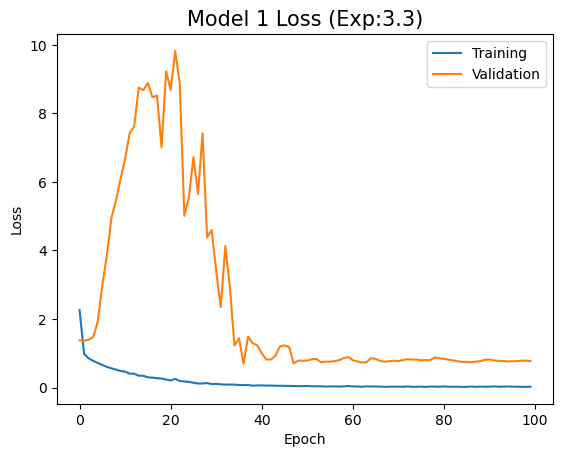

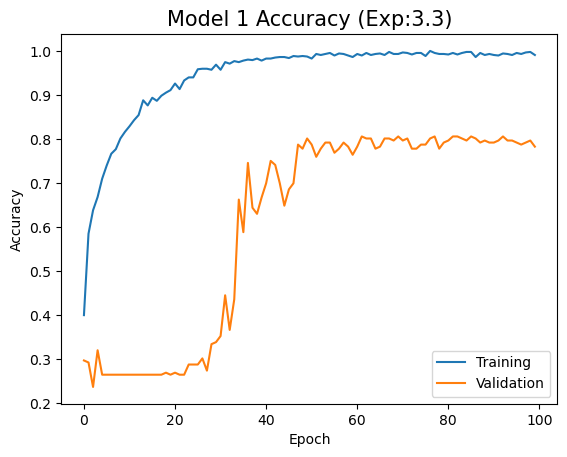

In [17]:
#Plot the training and validation loss
plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1 Loss (Exp:3.3)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 1 Accuracy (Exp:3.3)', fontsize = 15)


In [18]:
# Evaluate the test result for model 1, 2, 3
model_1.load_weights(checkpoint_filepath1)
Test_result1 = model_1.evaluate(test_images, test_labels, batch_size = 64)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7856 - loss: 0.7645 


In [19]:

#Obtain the model's prediction for the test_images
predictions1 = model_1.predict(test_images)
pred_label1 = np.argmax(predictions1, axis = 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


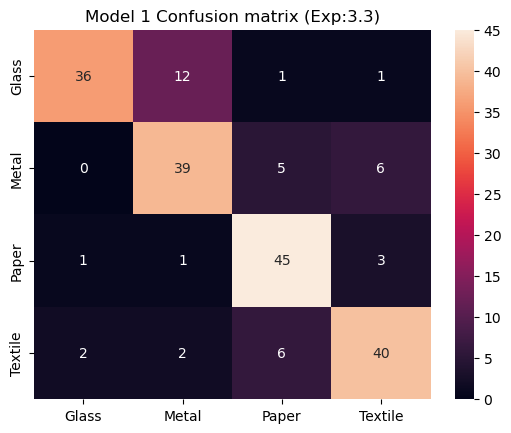

In [20]:
CMs = confusion_matrix(test_labels, pred_label1)
ax = plt.axes()
sns.heatmap(CMs, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model 1 Confusion matrix (Exp:3.3)')
plt.show()

## Model 2 and 3

In [21]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (64, 64)

In [22]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        #Empty Image and Labels list
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [23]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:01<00:00, 196.49it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 173.93it/s]


In [24]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [25]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [26]:
def model_2():
    inputs = tf.keras.Input(shape = (64,64,3))
    X = tf.keras.layers.Conv2D(32, (3,3), padding = 'same')(inputs)
    X = tf.keras.layers.BatchNormalization()(X)                          
    X = tf.keras.activations.relu(X)                       
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    
    # Block 2
    X = tf.keras.layers.Conv2D(64, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
       
    # Block 3
    X = tf.keras.layers.Conv2D(128, (3,3), padding ='same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
       
    # Block 3
    X = tf.keras.layers.Conv2D(64, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(128, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(X)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model
    
model_2 = model_2()   
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 299,908 (1.14 MB)

 Trainable params: 299,332 (1.14 MB)

 Non-trainable params: 576 (2.25 KB)

In [27]:
def model_3():
    inputs = tf.keras.Input(shape = (64,64,3))
    X = tf.keras.layers.Conv2D(32, (3,3), padding = 'same') (inputs)
    X = tf.keras.layers.BatchNormalization()(X)                          
    X = tf.keras.activations.relu(X)                       
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.1)(X)
    
    # Block 2
    X = tf.keras.layers.Conv2D(64, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
       
    # Block 3
    X = tf.keras.layers.Conv2D(128, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
       
    # Block 4
    X = tf.keras.layers.Conv2D(64, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    
    # Block 5
    X = tf.keras.layers.Conv2D(32, (3,3), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization()(X)                             
    X = tf.keras.activations.relu(X)
    X = tf.keras.layers.MaxPooling2D((2,2))(X)
    X = tf.keras.layers.Dropout(0.2)(X)
         
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(128, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.2)(X)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(X)
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    return model
    
model_3 = model_3()   
model_3.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 203,812 (796.14 KB)

 Trainable params: 203,172 (793.64 KB)

 Non-trainable params: 640 (2.50 KB)

In [28]:
#Model Checkpoint callback
checkpoint_filepath2 = 'C:/Mani/ModelCheckpoint/model2.keras'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

checkpoint_filepath3 = 'C:/Mani/ModelCheckpoint/model3.keras'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath3,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [29]:
# Compile model 2 and 3

model_2.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer = tf.keras.optimizers.Adam(0.00098),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
               

In [30]:
#Learning rate scheduler for Model 3

def scheduler2(epoch, lr):
    if epoch <= 45:
        return lr
    else:
        return lr * 0.95
        
    
lr_callback2 = LearningRateScheduler(scheduler2, verbose=1)

In [31]:
# Register the model training start time.
start_time = datetime.now()
print('Time model start:', start_time)


history2 = model_2.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[lr_callback1, model_checkpoint_callback2])


# Register the model training end time.
end_time = datetime.now()
print('Time model end:', end_time)
print('Model_2_training_time', end_time - start_time)


Time model start: 2024-11-08 19:05:42.225201

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3851 - loss: 2.0200
Epoch 1: val_accuracy improved from -inf to 0.23611, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 334ms/step - accuracy: 0.3892 - loss: 1.9950 - val_accuracy: 0.2361 - val_loss: 1.3649 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5661 - loss: 1.0310
Epoch 2: val_accuracy improved from 0.23611 to 0.25463, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.5681 - loss: 1.0271 - val_accuracy: 0.2546 - val_loss: 1.3547 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28


Epoch 20: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 20/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8995 - loss: 0.2712
Epoch 20: val_accuracy did not improve from 0.26852
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.8994 - loss: 0.2721 - val_accuracy: 0.2639 - val_loss: 6.2232 - learning_rate: 0.0010

Epoch 21: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 21/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9131 - loss: 0.2770
Epoch 21: val_accuracy did not improve from 0.26852
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.9129 - loss: 0.2763 - val_accuracy: 0.2639 - val_loss: 5.1191 - learning_rate: 0.0010

Epoch 22: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 22/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9264 - loss: 0.2508
Epoch 22: val_accuracy did not improve from 0.26852
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.


Epoch 38: LearningRateScheduler setting learning rate to 0.0006983372120885178.
Epoch 38/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9834 - loss: 0.0611
Epoch 38: val_accuracy did not improve from 0.68056
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.9832 - loss: 0.0615 - val_accuracy: 0.6806 - val_loss: 1.2370 - learning_rate: 6.9834e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.0006634203542489559.
Epoch 39/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.9804 - loss: 0.0623
Epoch 39: val_accuracy did not improve from 0.68056
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.9803 - loss: 0.0624 - val_accuracy: 0.6713 - val_loss: 1.2558 - learning_rate: 6.6342e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.0006302493420662358.
Epoch 40/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9802 - loss: 0.0659
Epoch 40: val_accuracy improved from 0.68056 to 0.72222, saving model to C:/Mani/ModelCheckpoint/mo

Epoch 56/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9945 - loss: 0.0283
Epoch 56: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.9944 - loss: 0.0284 - val_accuracy: 0.7917 - val_loss: 0.9758 - learning_rate: 2.7739e-04

Epoch 57: LearningRateScheduler setting learning rate to 0.0002635200624354184.
Epoch 57/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9900 - loss: 0.0361
Epoch 57: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.9901 - loss: 0.0360 - val_accuracy: 0.7824 - val_loss: 0.8038 - learning_rate: 2.6352e-04

Epoch 58: LearningRateScheduler setting learning rate to 0.0002503440482541919.
Epoch 58/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.9971 - loss: 0.0228
Epoch 58: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.9970 - loss: 0.0228 - val_accuracy: 0.8241 - val_loss: 0.7200 - learning_

Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9911 - loss: 0.0212
Epoch 75: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.9912 - loss: 0.0212 - val_accuracy: 0.8287 - val_loss: 0.7322 - learning_rate: 1.0467e-04

Epoch 76: LearningRateScheduler setting learning rate to 9.944023768184706e-05.
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.9973 - loss: 0.0196
Epoch 76: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 301ms/step - accuracy: 0.9971 - loss: 0.0199 - val_accuracy: 0.8333 - val_loss: 0.6451 - learning_rate: 9.9440e-05

Epoch 77: LearningRateScheduler setting learning rate to 9.446822441532275e-05.
Epoch 77/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9975 - loss: 0.0166
Epoch 77: val_accuracy did not improve from 0.83796
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9976 - loss: 0.0165 - val_accuracy: 0.8333 - val_loss: 0.6088 - learning_


Epoch 94: LearningRateScheduler setting learning rate to 3.949908405047608e-05.
Epoch 94/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9937 - loss: 0.0221
Epoch 94: val_accuracy did not improve from 0.84722
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 0.9938 - loss: 0.0221 - val_accuracy: 0.8194 - val_loss: 0.7192 - learning_rate: 3.9499e-05

Epoch 95: LearningRateScheduler setting learning rate to 3.752413140318822e-05.
Epoch 95/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9854 - loss: 0.0275
Epoch 95: val_accuracy did not improve from 0.84722
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 312ms/step - accuracy: 0.9859 - loss: 0.0271 - val_accuracy: 0.8241 - val_loss: 0.6935 - learning_rate: 3.7524e-05

Epoch 96: LearningRateScheduler setting learning rate to 3.564792586985277e-05.
Epoch 96/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.9984 - loss: 0.0091
Epoch 96: val_accuracy did not improve from 0.84722
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accu

In [32]:
# Register the model training start time.
start_time = datetime.now()
print('Time model start:', start_time)

history3 = model_3.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[lr_callback2, model_checkpoint_callback3])


# Register the model training end time.
end_time = datetime.now()
print('Time model end:', end_time)
print('Model_3_training_time', end_time - start_time )

Time model start: 2024-11-08 19:13:00.630096

Epoch 1: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.3134 - loss: 1.8071
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.3179 - loss: 1.7889 - val_accuracy: 0.3333 - val_loss: 1.3724 - learning_rate: 9.8000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5541 - loss: 1.0915
Epoch 2: val_accuracy did not improve from 0.33333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.5551 - loss: 1.0901 - val_accuracy: 0.2639 - val_loss: 1.3659 - learning_rate: 9.8000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5771 - loss: 1.0392
Epoch 


Epoch 20: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 20/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8674 - loss: 0.3154
Epoch 20: val_accuracy did not improve from 0.33333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.8669 - loss: 0.3177 - val_accuracy: 0.2685 - val_loss: 5.8874 - learning_rate: 9.8000e-04

Epoch 21: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 21/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8614 - loss: 0.3569
Epoch 21: val_accuracy did not improve from 0.33333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.8615 - loss: 0.3582 - val_accuracy: 0.3102 - val_loss: 3.6940 - learning_rate: 9.8000e-04

Epoch 22: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 22/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8701 - loss: 0.3526
Epoch 22: val_accuracy did not improve from 0.33333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accu

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9503 - loss: 0.1227
Epoch 38: val_accuracy improved from 0.69907 to 0.70370, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.9509 - loss: 0.1217 - val_accuracy: 0.7037 - val_loss: 1.0731 - learning_rate: 9.8000e-04

Epoch 39: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 39/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9588 - loss: 0.1193
Epoch 39: val_accuracy did not improve from 0.70370
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.9589 - loss: 0.1194 - val_accuracy: 0.6898 - val_loss: 0.9593 - learning_rate: 9.8000e-04

Epoch 40: LearningRateScheduler setting learning rate to 0.0009800000116229057.
Epoch 40/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9676 - loss: 0.1098
Epoch 40: val_accuracy improved from 0.70370 to 0.72222, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.9842 - loss: 0.0592 - val_accuracy: 0.6944 - val_loss: 1.2952 - learning_rate: 5.8676e-04

Epoch 57: LearningRateScheduler setting learning rate to 0.000557424098951742.
Epoch 57/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9846 - loss: 0.0527
Epoch 57: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9845 - loss: 0.0526 - val_accuracy: 0.7870 - val_loss: 0.8712 - learning_rate: 5.5742e-04

Epoch 58: LearningRateScheduler setting learning rate to 0.0005295528884744271.
Epoch 58/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9917 - loss: 0.0382
Epoch 58: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 309ms/step - accuracy: 0.9918 - loss: 0.0378 - val_accuracy: 0.7685 - val_loss: 0.9650 - learning_rate: 5.2955e-04

Epoch 59: LearningRateScheduler setting learning rate to 0.0005030752246966585.
Epoch 59/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9941 - loss: 0.0275
Epoch 75: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9940 - loss: 0.0277 - val_accuracy: 0.8148 - val_loss: 0.8545 - learning_rate: 2.2142e-04

Epoch 76: LearningRateScheduler setting learning rate to 0.00021034593737567775.
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9948 - loss: 0.0217
Epoch 76: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.9948 - loss: 0.0216 - val_accuracy: 0.8148 - val_loss: 0.8606 - learning_rate: 2.1035e-04

Epoch 77: LearningRateScheduler setting learning rate to 0.00019982864396297372.
Epoch 77/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9937 - loss: 0.0180
Epoch 77: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 303ms/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.8287 - val_loss: 0.8442 - learning_rate: 1.998


Epoch 94: LearningRateScheduler setting learning rate to 8.355241734534501e-05.
Epoch 94/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9955 - loss: 0.0139
Epoch 94: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.8333 - val_loss: 0.8108 - learning_rate: 8.3552e-05

Epoch 95: LearningRateScheduler setting learning rate to 7.937479786050972e-05.
Epoch 95/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.9997 - loss: 0.0130
Epoch 95: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9997 - loss: 0.0131 - val_accuracy: 0.8426 - val_loss: 0.8174 - learning_rate: 7.9375e-05

Epoch 96: LearningRateScheduler setting learning rate to 7.540605693066026e-05.
Epoch 96/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.9978 - loss: 0.0119
Epoch 96: val_accuracy did not improve from 0.85648
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accu

Text(0.5, 1.0, 'Model 2 Accuracy (Exp:3.3)')

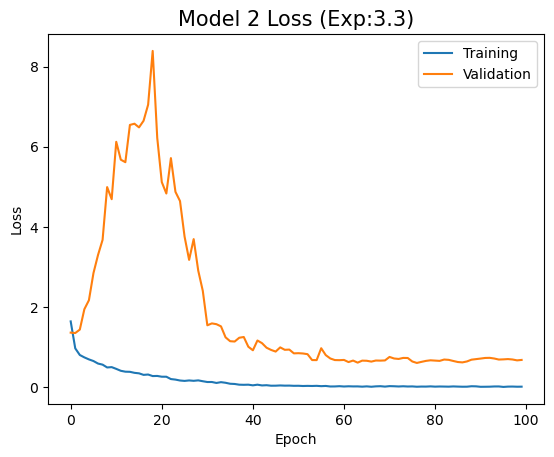

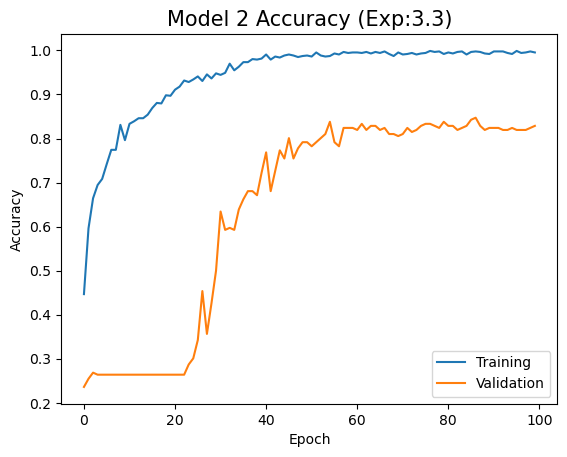

In [33]:
#Plot the training and validation loss
plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 2 Loss (Exp:3.3)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 2 Accuracy (Exp:3.3)', fontsize = 15)

Text(0.5, 1.0, 'Model 3 Accuracy (Exp:3.3)')

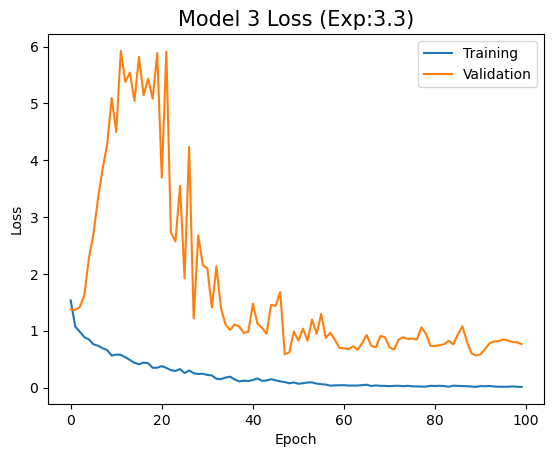

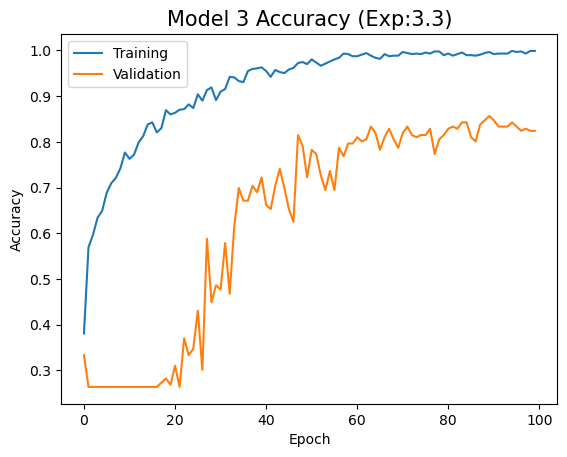

In [34]:
#Plot the training and validation loss
plt.figure()
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 3 Loss (Exp:3.3)', fontsize = 15)

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 3 Accuracy (Exp:3.3)', fontsize = 15)

In [35]:
# Evaluate the test result for model 1 and 2

model_2.load_weights(checkpoint_filepath2)
Test_result2 = model_2.evaluate(test_images, test_labels, batch_size=64)

model_3.load_weights(checkpoint_filepath3)
Test_result3 = model_3.evaluate(test_images, test_labels, batch_size=64)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8442 - loss: 0.4910
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8230 - loss: 0.7003


In [36]:
#Obtain the model's prediction for the test_images
predictions2 = model_2.predict(test_images)

pred_label2 = np.argmax(predictions2, axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


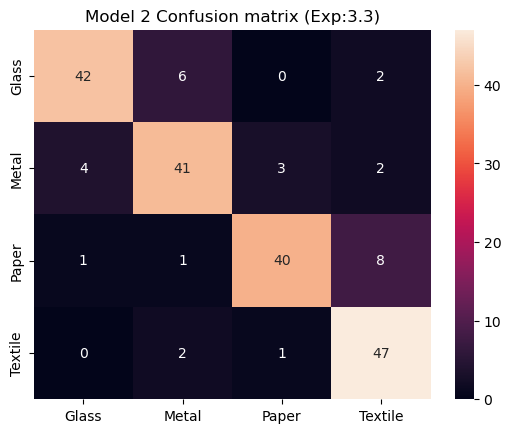

In [37]:
CM2 = confusion_matrix(test_labels, pred_label2)
ax = plt.axes()
sns.heatmap(CM2, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model 2 Confusion matrix (Exp:3.3)')
plt.show()

In [38]:
#Obtain the model's prediction for the test_images
predictions3 = model_3.predict(test_images)

pred_label3 = np.argmax(predictions3, axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


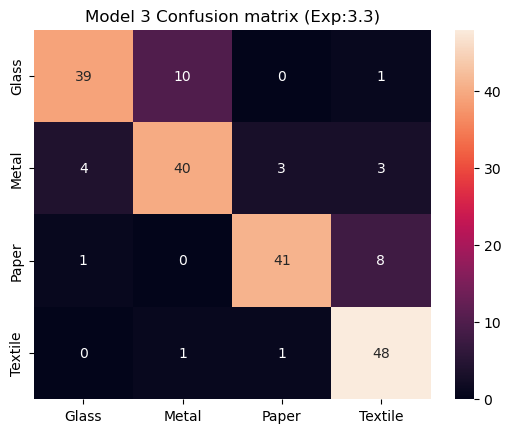

In [39]:
CM3 = confusion_matrix(test_labels, pred_label3)
ax = plt.axes()
sns.heatmap(CM3, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model 3 Confusion matrix (Exp:3.3)')
plt.show()